In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic['Survived'] = titanic['Survived'].astype('bool')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# dropping the unnecessary features
unimportant = ['Cabin','SibSp','Name','Ticket']
df = titanic.drop(columns = unimportant)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
# filling the na values
import warnings
warnings.filterwarnings('ignore')
df['Age'].fillna(df['Age'].mode()[0],inplace=True)
df.isnull().sum()
df = df.dropna()
print(df.shape)
df.isnull().sum()

(889, 8)


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [8]:
#label encoding the age column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Survived'] = encoder.fit_transform(df['Survived'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
print(df)

     PassengerId  Survived  Pclass  Sex   Age  Parch     Fare  Embarked
0              1         0       3    1  22.0      0   7.2500         2
1              2         1       1    0  38.0      0  71.2833         0
2              3         1       3    0  26.0      0   7.9250         2
3              4         1       1    0  35.0      0  53.1000         2
4              5         0       3    1  35.0      0   8.0500         2
..           ...       ...     ...  ...   ...    ...      ...       ...
886          887         0       2    1  27.0      0  13.0000         2
887          888         1       1    0  19.0      0  30.0000         2
888          889         0       3    0  24.0      2  23.4500         2
889          890         1       1    1  26.0      0  30.0000         0
890          891         0       3    1  32.0      0   7.7500         1

[889 rows x 8 columns]


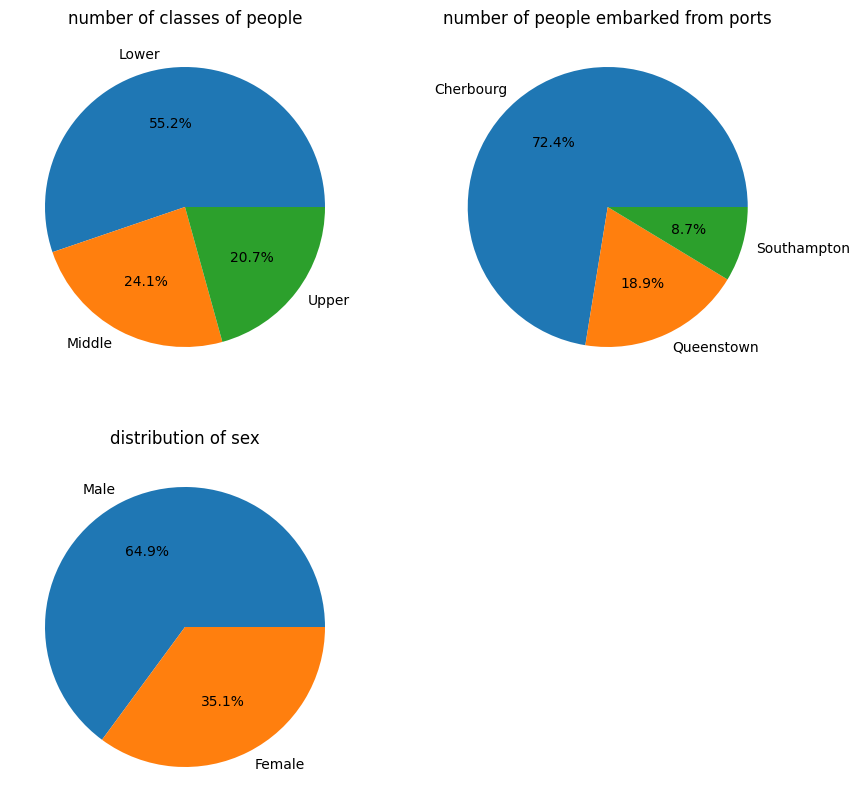

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.pie(df['Pclass'].value_counts(),labels=['Lower','Middle','Upper'],
   autopct='%1.1f%%')
plt.title('number of classes of people')
plt.subplot(2,2,2)
plt.pie(df['Embarked'].value_counts(),labels=['Cherbourg', 'Queenstown', 'Southampton'],
   autopct='%1.1f%%')
plt.title('number of people embarked from ports')
plt.subplot(2,2,3)
plt.pie(df['Sex'].value_counts(),labels=['Male','Female'],
   autopct='%1.1f%%')
plt.title('distribution of sex');

In [10]:
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')
X_test = X_test.drop(columns=unimportant)
X_test['Age'].fillna(X_test['Age'].mode()[0],inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)
X_test['Sex'] = encoder.fit_transform(X_test['Sex'])
X_test['Embarked'] = encoder.fit_transform(X_test['Embarked'])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

y_train = df['Survived']
X_train = df.drop(columns=['Survived'])

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # 5-fold cross-validation with F1 scoring
    print(f'{name}: F1 Scores = {scores.mean()}')

Logistic Regression: F1 Scores = 0.68662680282324
Support Vector Machine: F1 Scores = 0.16188248860206303
K-Nearest Neighbors: F1 Scores = 0.3452611260201345
Decision Tree: F1 Scores = 0.6632951578835964
Random Forest: F1 Scores = 0.6920504074349314
Gradient Boosting: F1 Scores = 0.5948441282906148
AdaBoost: F1 Scores = 0.46727334613777466
Gaussian Naive Bayes: F1 Scores = 0.6871924731596353
Linear Discriminant Analysis: F1 Scores = 0.7176420758671511
Quadratic Discriminant Analysis: F1 Scores = 0.7152034457478005


In [12]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [13]:
result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
result.head(2)
result.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [14]:
result.drop(columns=['Survived'],inplace=True)
result['Survived'] = prediction
result.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [15]:
result.to_csv( '/kaggle/working/submission.csv', index = False )